# DMV Assignment-2

In [ ]:
https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Imported Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json

# Interact with the OpenWeatherMap API.

In [58]:
api_key = 'aa6a98a09676c111e1700d440c1cf4a1'

cities = [ 'India','New York','USA','London','Tokyo','Russia','China','Nepal','Indonesia','Malaysia','Iran']

weather_data_list = []

for city in cities:
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
    response = requests.get(url)
    data = response.json()
    
    #Extract relevant weather attributes.
    temperature = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    rainfall = data.get('rain', {}).get('1h', 0)
    snowfall = data.get('snow', {}).get('1h', 0)
    
    weather_data = {
        'Country': city,
        'Temperature': temperature,
        'Humidity': humidity,
        'Wind Speed': wind_speed,
        'Rainfall': rainfall,
        'Snowfall': snowfall
    }
    
    weather_data_list.append(weather_data)

weather_df = pd.DataFrame(weather_data_list)
weather_df

,Country,Temperature,Humidity,Wind Speed,Rainfall,Snowfall
0,India,301.15,37,2.57,0,0
1,New York,294.80,54,5.14,0,0
2,USA,298.03,44,4.40,0,0
3,London,299.99,40,2.57,0,0
4,Tokyo,301.12,85,5.14,0,0
5,Russia,289.20,65,1.79,0,0
6,China,301.28,62,2.47,0,0
7,Nepal,293.56,92,0.80,0,0
8,Indonesia,296.56,95,1.47,0,0
9,Malaysia,295.90,97,0.43,0,0


# Perform data modeling

In [59]:
avg_temperature = weather_df['Temperature'].mean()
max_temperature = weather_df['Temperature'].max()
min_temperature = weather_df['Temperature'].min()
print(f"Average Temperature: {avg_temperature:.2f}°C")
print(f"Maximum Temperature: {max_temperature:.2f}°C")
print(f"Minimum Temperature: {min_temperature:.2f}°C")

Average Temperature: 298.06°C
Maximum Temperature: 307.07°C
Minimum Temperature: 289.20°C


# Visualize the weather data.

# Line Plot

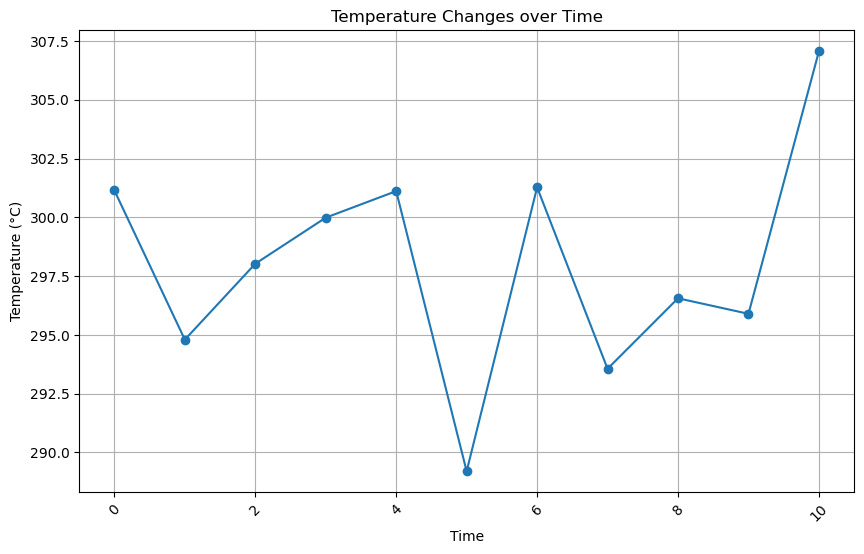

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(weather_df.index, weather_df['Temperature'], marker='o')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Bar Plot

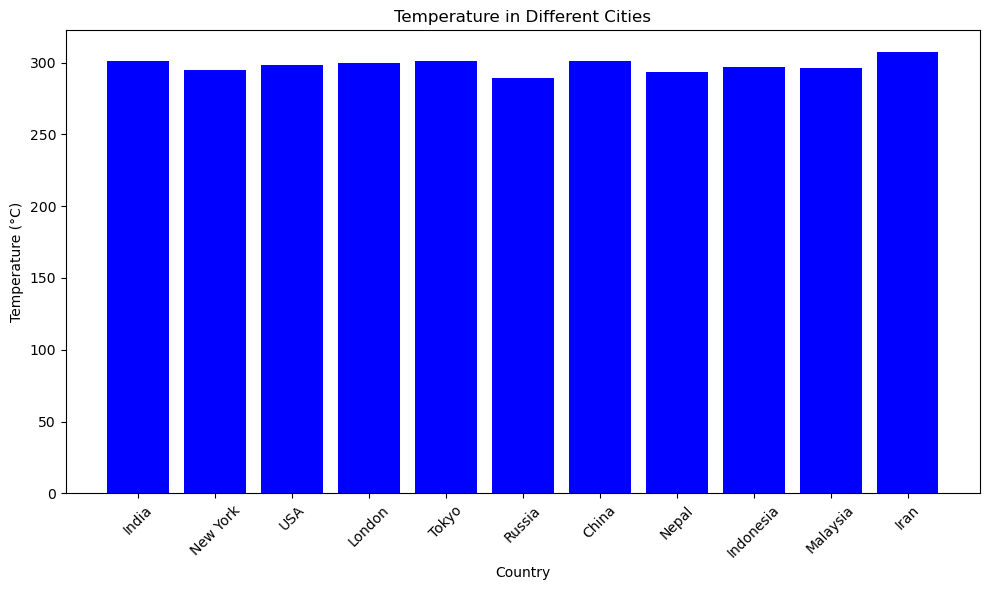

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(weather_df['Country'], weather_df['Temperature'], color='Blue')
plt.xlabel('Country')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Different Cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


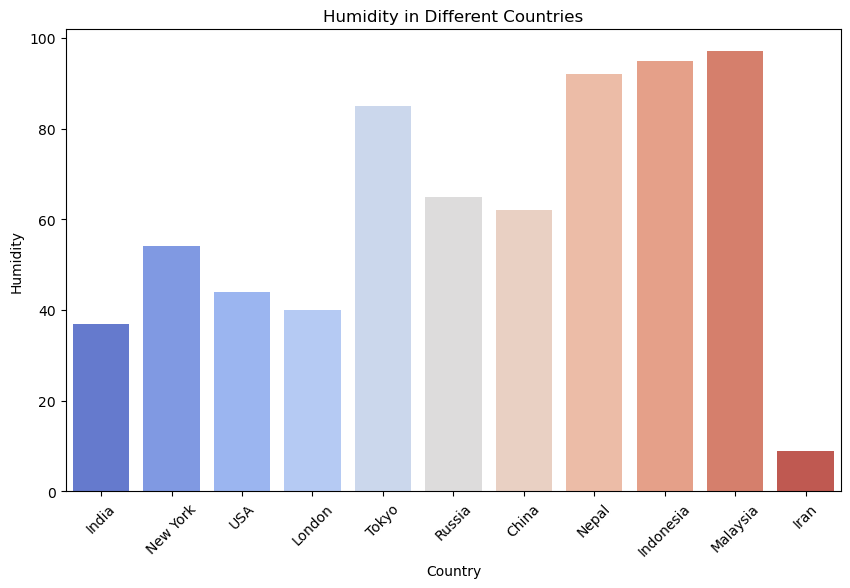

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Humidity', data=weather_df, palette='coolwarm')
plt.title('Humidity in Different Countries')
plt.xticks(rotation=45)
plt.show()

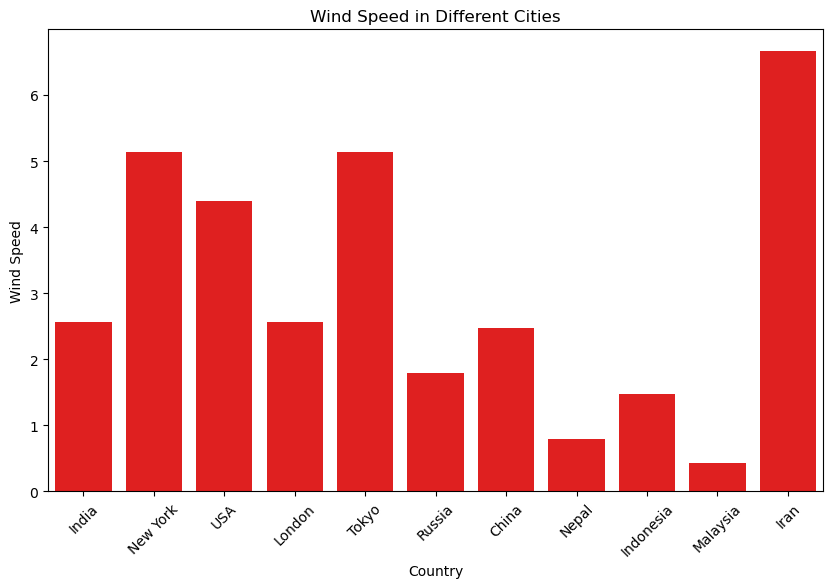

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Wind Speed', data=weather_df, color='Red')
plt.title('Wind Speed in Different Cities')
plt.xticks(rotation=45)
plt.show()

# Heatmap

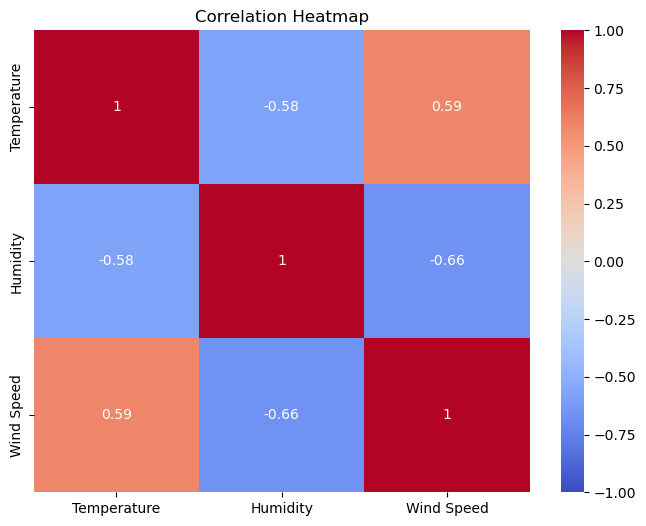

In [64]:
correlation_matrix = weather_df[['Temperature', 'Humidity', 'Wind Speed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()